In [4]:
import idx2numpy 
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Paths
train_images_path = 'samples/train-images-idx3-ubyte'
train_labels_path = 'samples/train-labels-idx1-ubyte'
test_images_path = 'samples/t10k-images-idx3-ubyte'
test_labels_path = 'samples/t10k-labels-idx1-ubyte'

In [6]:
# Converting idx to numpy
train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)
test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)


In [7]:
# Visualization
def display_images(images, labels, num_images=20):
    # Dimensions for the subplot grid
    num_columns = 5
    num_rows = num_images // num_columns
    
    # Figure with subplot per image
    plt.figure(figsize=(10, 2 * num_rows))
    
    for i in range(num_images):
        plt.subplot(num_rows, num_columns, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')  # Turn off axis ticks and labels
    plt.tight_layout()
    plt.show()

Training Set examples


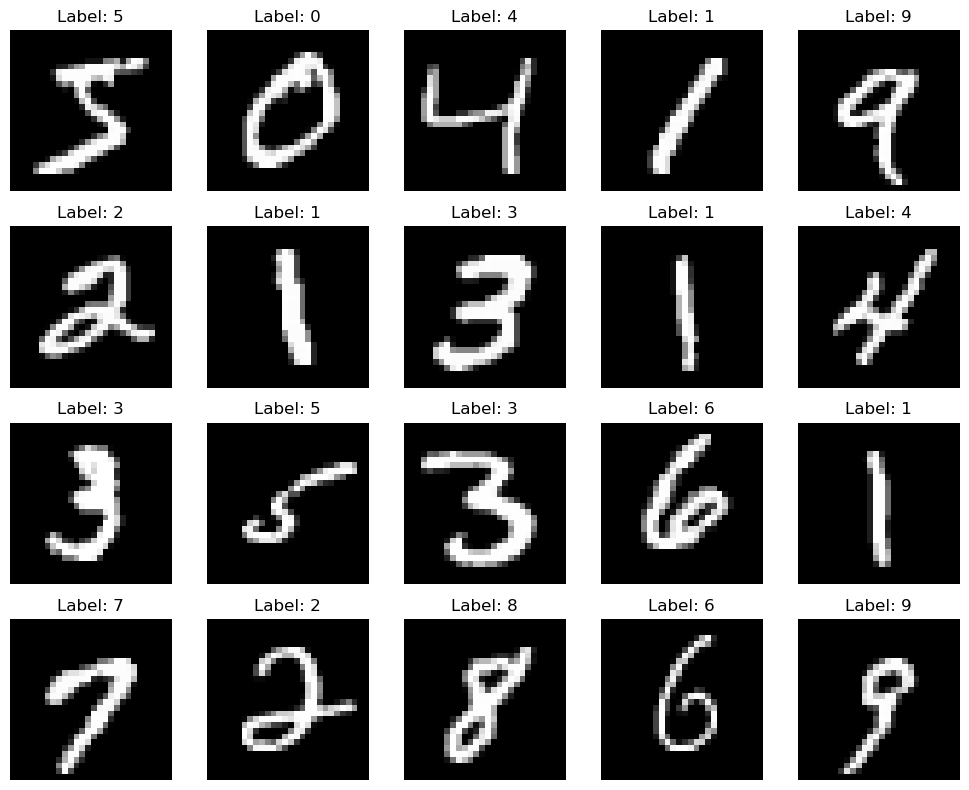

_______________________________________________________________________________________________________________________
Test set examples


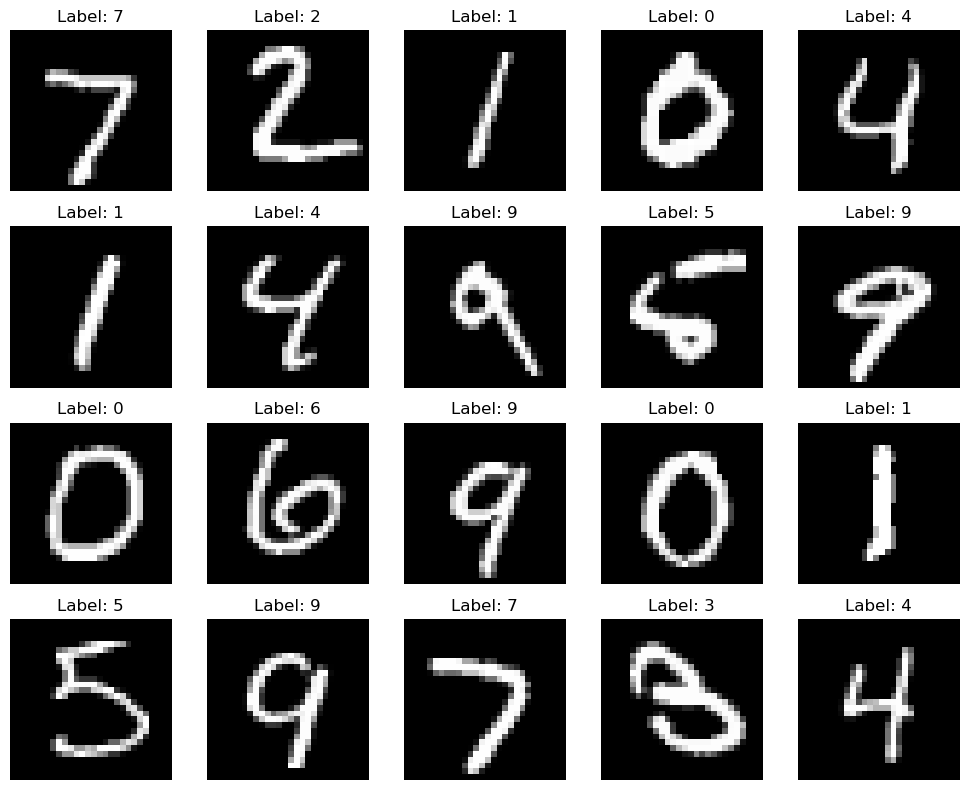

In [8]:
# Display 20 images from the training set
print('Training Set examples')
display_images(train_images, train_labels, num_images=20)
print('_______________________________________________________________________________________________________________________')
print('Test set examples')
# Display 20 images from the test set
display_images(test_images, test_labels, num_images=20)

In [9]:
import pandas as pd


def count_numbers_dict(lst):
    number_counts = {}
    for number in lst:
        if number in number_counts:
            number_counts[number] += 1
        else:
            number_counts[number] = 1
    return number_counts


train_counts_dict = count_numbers_dict(train_labels)
test_counts_dict = count_numbers_dict(test_labels)


# Prepare data for plotting
data = []
for key in set(train_counts_dict.keys()).union(test_counts_dict.keys()):
    data.append({'Label': key, 'Count': train_counts_dict.get(key, 0), 'Type': 'Train'})
    data.append({'Label': key, 'Count': test_counts_dict.get(key, 0), 'Type': 'Test'})

    
# Convert data into a pandas DataFrame
df = pd.DataFrame(data)


print("Train Labels Counts:")
for number, count in sorted(train_counts_dict.items()):
    print(f"Number {number}: {count} time(s)")

print("\nTest Labels Counts:")
for number, count in sorted(test_counts_dict.items()):
    print(f"Number {number}: {count} time(s)")



Train Labels Counts:
Number 0: 5923 time(s)
Number 1: 6742 time(s)
Number 2: 5958 time(s)
Number 3: 6131 time(s)
Number 4: 5842 time(s)
Number 5: 5421 time(s)
Number 6: 5918 time(s)
Number 7: 6265 time(s)
Number 8: 5851 time(s)
Number 9: 5949 time(s)

Test Labels Counts:
Number 0: 980 time(s)
Number 1: 1135 time(s)
Number 2: 1032 time(s)
Number 3: 1010 time(s)
Number 4: 982 time(s)
Number 5: 892 time(s)
Number 6: 958 time(s)
Number 7: 1028 time(s)
Number 8: 974 time(s)
Number 9: 1009 time(s)


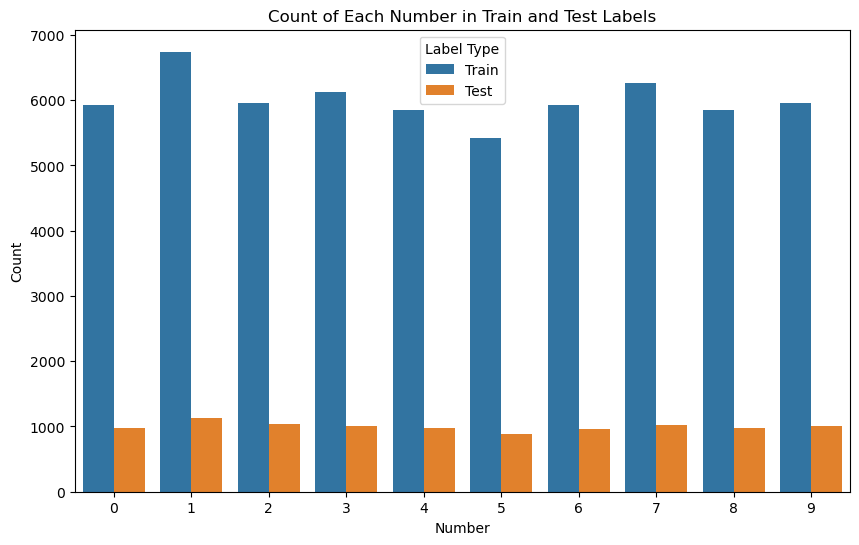

In [10]:
import seaborn as sns
#Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="Label", y="Count", hue="Type", data=df.sort_values("Label"))
plt.title("Count of Each Number in Train and Test Labels")
plt.xlabel("Number")
plt.ylabel("Count")
plt.legend(title="Label Type")
plt.show()



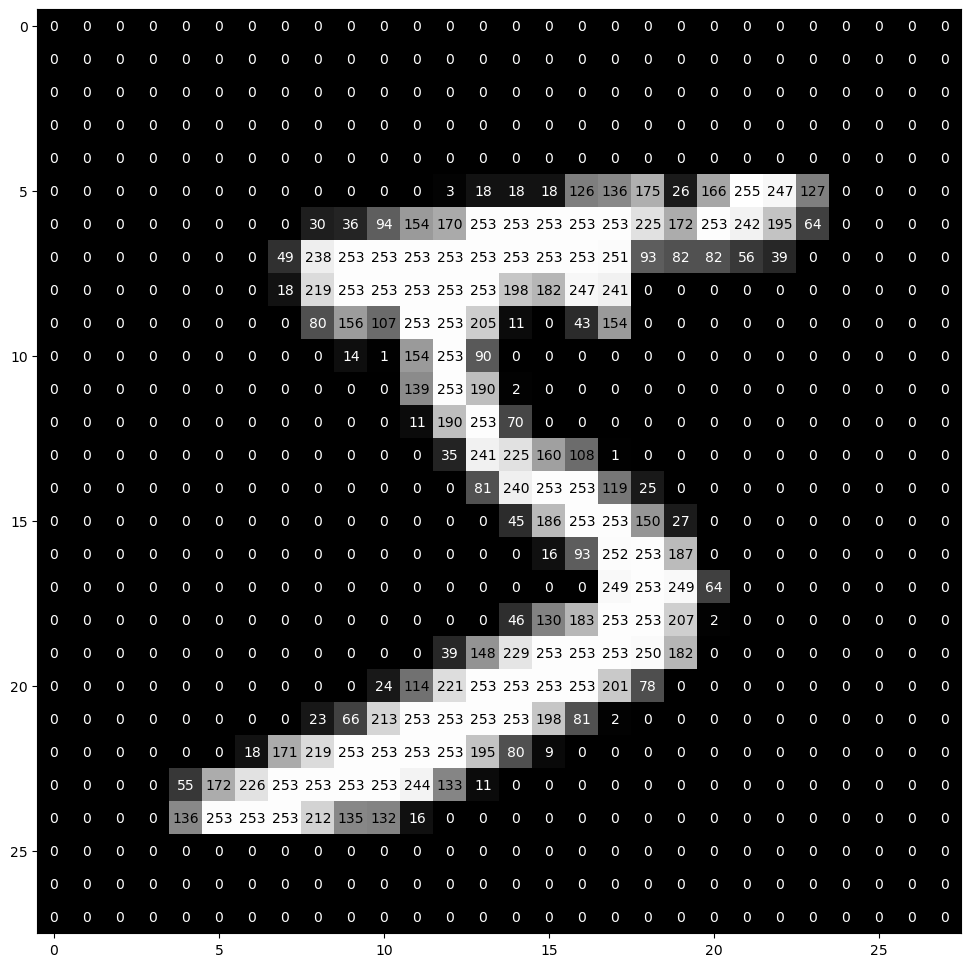

In [11]:
# Taken from SOHAM MUKHERJEE

def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(train_images[0].reshape(28,28), ax)

The cell above shows the 2D shape of the numbers, displaying the number for each individual grid piece (28x28). The number is of range 0-255, after normalization thus between 0-1. 

# Data preprocessing
We need to preprocess the data for the following reasons: 

### Normalization
Normalization scales the input features to a similar range, which is important for:

Improving Gradient Descent Efficiency: Neural networks use gradient descent (or variants thereof) to adjust weights based on the error gradient. If features have vastly different scales, gradient descent can become inefficient, leading to longer training times or convergence to suboptimal solutions.

Enhancing Model Convergence: When input features are on a similar scale, the loss surface (the surface that the algorithm navigates to minimize the loss function) is more manageable, and the algorithm can converge more quickly to the minimum.

Preventing Distorted Weight Updates: Without normalization, features with larger scales dominate the weight updates, potentially leading to distorted models that don’t generalize well.

### Reshaping
Reshaping the data is necessary to match the input requirements of different types of neural network architectures:

For Dense Networks: Flattening images into vectors is common since each input neuron represents one feature (in this case, one pixel). This transformation is necessary because dense layers do not preserve the spatial structure of the images.

For Convolutional Neural Networks (CNNs): CNNs require the data to maintain its spatial structure (i.e., the 2D shape of images) because they extract features by applying filters across the image. Thus, images need to be reshaped to include a channel dimension, ensuring the model correctly interprets the input data's spatial and depth (color channel) dimensions.

In [10]:
# Print shapes after preprocessing
print("Unshaped training data shape for CNN:", train_images.shape)
print("Unshaped test data shape for CNN:", test_images.shape)


Unshaped training data shape for CNN: (60000, 28, 28)
Unshaped test data shape for CNN: (10000, 28, 28)


In [11]:
# Normalization
train_images = train_images / 255
test_images = test_images / 255
# The input image is made up of RGB pixels ranged between 0-255 we need to normalize that between 0-1, before using it in the model.

# Reshaping for CNN
train_images_cnn = train_images.reshape((60000, 28, 28, 1))
test_images_cnn = test_images.reshape((10000, 28, 28, 1))

In [12]:
# Print shapes after preprocessing
print("Reshaped training data shape for CNN:", train_images_cnn.shape)
print("Reshaped test data shape for CNN:", test_images_cnn.shape)


Reshaped training data shape for CNN: (60000, 28, 28, 1)
Reshaped test data shape for CNN: (10000, 28, 28, 1)


# Creating the model
Skip to: 'Fine Tuning' if we want to test hyperparameter tuning. 

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model=Sequential()
model.add(Conv2D(32,(3,3),activation='elu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation= 'elu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_images,train_labels,epochs=10)


C:\Users\Gebruiker\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9114 - loss: 0.2956
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9816 - loss: 0.0591
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9896 - loss: 0.0345
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.9933 - loss: 0.0220
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9951 - loss: 0.0148
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9965 - loss: 0.0120
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9965 - loss: 0.0111
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9973 - loss: 0.0082
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9977 - loss: 0.0065
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.9979 - loss: 0.0056


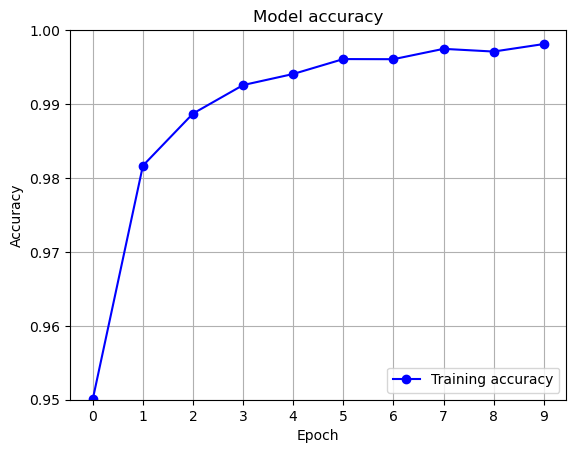

In [61]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values with a dot at each data point
plt.plot(history.history['accuracy'], 'bo-', label='Training accuracy')  


plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# Set the x-axis ticks to correspond to the epochs
plt.xticks(range(len(history.history['accuracy'])))
plt.ylim([0.95, 1])
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [62]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

# Evaluation

In [63]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print the results
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9821 - loss: 0.0893
Test loss: 0.0744696632027626
Test accuracy: 0.9850999712944031


# Fine Tuning
Rather than individually fine-tuning each parameter, we systematically explored every combination of selected hyperparameters. The grid included varying numbers of filters, kernel sizes, dense layer sizes, dropout rates, L2 regularization strengths (referred to as 'l2_lambda'), and learning rates. Given the manageable training and testing runtimes for the MNIST dataset, this comprehensive search was feasible, amounting to 64 unique configurations—derived from 2 options for each of the 6 hyperparameters. We projected an estimated total runtime of approximately 5 hours for this process. This thorough examination aimed to identify the optimal set of hyperparameters that yield the highest accuracy on the MNIST test data, ensuring a robust and well-generalizing model.

In [14]:
# Reshape the data to add a channel dimension of 1 (for grayscale)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


In [18]:
import csv

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to create a model with different hyperparameters
def create_model(num_filters, kernel_size, dense_size, dropout_rate, l2_lambda):
    model = Sequential()
    model.add(Conv2D(num_filters, kernel_size, activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Flatten())
    if l2_lambda > 0:
        model.add(Dense(dense_size, activation='relu', kernel_regularizer=l2(l2_lambda)))
    else:
        model.add(Dense(dense_size, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Parameters to try
param_grid = {
    'num_filters': [32, 64],
    'kernel_size': [(3, 3), (5, 5)],
    'dense_size': [128, 256],
    'dropout_rate': [0.0, 0.5],
    'l2_lambda': [0.0, 0.001],
    'learning_rate': [1e-3, 1e-4]
}

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)



results_file = 'model_results.csv'

# Open the file and write the header
with open(results_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header row
    writer.writerow(['num_filters', 'kernel_size', 'dense_size', 'dropout_rate', 'l2_lambda', 'learning_rate', 'test_loss', 'test_accuracy'])

# Loop over all combinations of parameters
for num_filters in param_grid['num_filters']:
    for kernel_size in param_grid['kernel_size']:
        for dense_size in param_grid['dense_size']:
            for dropout_rate in param_grid['dropout_rate']:
                for l2_lambda in param_grid['l2_lambda']:
                    for learning_rate in param_grid['learning_rate']:
                        # Create a new model with the current set of hyperparameters
                        model = create_model(num_filters, kernel_size, dense_size, dropout_rate, l2_lambda)
                        
                        # Compile the model
                        optimizer = Adam(learning_rate=learning_rate)
                        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                        
                        # Train the model with data augmentation
                        history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                                            validation_data=(test_images, test_labels),
                                            steps_per_epoch=len(train_images) // 32, epochs=10)
                        
                        # Evaluate the model
                        test_loss, test_accuracy = model.evaluate(test_images, test_labels)
                        print(f"Params: nf={num_filters}, ks={kernel_size}, ds={dense_size}, "
                              f"dr={dropout_rate}, l2={l2_lambda}, lr={learning_rate}, "
                              f"Test Accuracy: {test_accuracy:.4f}")

                        # Write the hyperparameters and the test accuracy to the file
                        with open(results_file, mode='a', newline='') as file:  # 'a' to append data to the file
                            writer = csv.writer(file)
                            # Write the hyperparameters and the test accuracy to the file
                            writer.writerow([num_filters, kernel_size, dense_size, dropout_rate, l2_lambda, learning_rate, test_loss, test_accuracy])



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8108 - loss: 0.5953 - val_accuracy: 0.9791 - val_loss: 0.0686
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9791 - val_loss: 0.0686
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9592 - loss: 0.1339 - val_accuracy: 0.9853 - val_loss: 0.0448
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9853 - val_loss: 0.0448
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9679 - loss: 0.0980 - val_accuracy: 0.9845 - val_loss: 0.0472
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9845 - val_loss: 0.0472
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9742 - loss: 0.0851 - val_accuracy: 0.9880 - val_loss: 0.0340
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/s

Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9559 - loss: 0.1416 - val_accuracy: 0.9863 - val_loss: 0.0466
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9863 - val_loss: 0.0466
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9642 - loss: 0.1129 - val_accuracy: 0.9821 - val_loss: 0.0562
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9821 - val_loss: 0.0562
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9674 - loss: 0.1027 - val_accuracy: 0.9828 - val_loss: 0.0486
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 357us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9828 - val_loss: 0.0486
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9803 - loss: 0.0556
Params: nf=32, ks=(3, 3), ds=128, dr=0.5, l2=0.0, lr=0.001, Test Accuracy: 0.9828
Epoch 1/10
1875/1875 ━━━━━

Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9795 - loss: 0.0687 - val_accuracy: 0.9899 - val_loss: 0.0308
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9899 - val_loss: 0.0308
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0358
Params: nf=32, ks=(3, 3), ds=256, dr=0.0, l2=0.0, lr=0.001, Test Accuracy: 0.9899
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.6830 - loss: 1.0661 - val_accuracy: 0.9669 - val_loss: 0.1413
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9669 - val_loss: 0.1413
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9230 - loss: 0.2744 - val_accuracy: 0.9742 - val_loss: 0.0988
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9742 - val_loss: 0.0988
Epoch 5/10
1875/1875 ━━━━━

Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9460 - loss: 0.1911 - val_accuracy: 0.9784 - val_loss: 0.0714
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 297us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9784 - val_loss: 0.0714
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9558 - loss: 0.1500 - val_accuracy: 0.9806 - val_loss: 0.0615
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9806 - val_loss: 0.0615
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9613 - loss: 0.1307 - val_accuracy: 0.9828 - val_loss: 0.0553
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9828 - val_loss: 0.0553
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: 0.0671
Params: nf=32, ks=(5, 5), ds=128, dr=0.0, l2=0.0, lr=0.0001, Test Accuracy: 0.9828
Epoch 1/10
1875/1875 ━━━━

Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9458 - loss: 0.1783 - val_accuracy: 0.9830 - val_loss: 0.0560
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 304us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9830 - val_loss: 0.0560
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9795 - loss: 0.0669
Params: nf=32, ks=(5, 5), ds=128, dr=0.5, l2=0.0, lr=0.0001, Test Accuracy: 0.9830
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7986 - loss: 0.8438 - val_accuracy: 0.9766 - val_loss: 0.2783
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 380us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9766 - val_loss: 0.2783
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9350 - loss: 0.4102 - val_accuracy: 0.9763 - val_loss: 0.2762
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9763 - val_loss: 0.2762
Epoch 5/10
1875/1875 ━━━━

Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9445 - loss: 0.4269 - val_accuracy: 0.9813 - val_loss: 0.3050
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9813 - val_loss: 0.3050
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9494 - loss: 0.3994 - val_accuracy: 0.9822 - val_loss: 0.2797
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9822 - val_loss: 0.2797
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9515 - loss: 0.3798 - val_accuracy: 0.9854 - val_loss: 0.2603
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9854 - val_loss: 0.2603
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.2727
Params: nf=32, ks=(5, 5), ds=256, dr=0.5, l2=0.001, lr=0.001, Test Accuracy: 0.9854
Epoch 1/10
1875/1875 ━━━

Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9522 - loss: 0.2791 - val_accuracy: 0.9787 - val_loss: 0.1871
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9787 - val_loss: 0.1871
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9748 - loss: 0.2005
Params: nf=64, ks=(3, 3), ds=128, dr=0.0, l2=0.001, lr=0.001, Test Accuracy: 0.9787
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.6686 - loss: 1.2780 - val_accuracy: 0.9602 - val_loss: 0.3397
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9602 - val_loss: 0.3397
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9116 - loss: 0.4830 - val_accuracy: 0.9662 - val_loss: 0.2729
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9662 - val_loss: 0.2729
Epoch 5/10
1875/1875 ━━━

Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9380 - loss: 0.3640 - val_accuracy: 0.9721 - val_loss: 0.2236
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9721 - val_loss: 0.2236
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9463 - loss: 0.3093 - val_accuracy: 0.9692 - val_loss: 0.2094
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9692 - val_loss: 0.2094
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9497 - loss: 0.2793 - val_accuracy: 0.9777 - val_loss: 0.1786
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9777 - val_loss: 0.1786
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9729 - loss: 0.1932
Params: nf=64, ks=(3, 3), ds=256, dr=0.0, l2=0.001, lr=0.0001, Test Accuracy: 0.9777
Epoch 1/10
1875/1875 ━━

Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 64ms/step - accuracy: 0.9445 - loss: 0.3346 - val_accuracy: 0.9792 - val_loss: 0.2050
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9792 - val_loss: 0.2050
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9751 - loss: 0.2188
Params: nf=64, ks=(3, 3), ds=256, dr=0.5, l2=0.001, lr=0.0001, Test Accuracy: 0.9792
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 24ms/step - accuracy: 0.8471 - loss: 0.4754 - val_accuracy: 0.9816 - val_loss: 0.0540
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9816 - val_loss: 0.0540
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9656 - loss: 0.1107 - val_accuracy: 0.9859 - val_loss: 0.0435
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9859 - val_loss: 0.0435
Epoch 5/10
1875/1875 ━━

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 39ms/step - accuracy: 0.7337 - loss: 1.2463 - val_accuracy: 0.9738 - val_loss: 0.3325
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9738 - val_loss: 0.3325
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9414 - loss: 0.4141 - val_accuracy: 0.9792 - val_loss: 0.2209
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9792 - val_loss: 0.2209
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9513 - loss: 0.3087 - val_accuracy: 0.9759 - val_loss: 0.1950
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9759 - val_loss: 0.1950
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9589 - loss: 0.2560 - val_accuracy: 0.9820 - val_loss: 0.1566
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - ac

Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9819 - val_loss: 0.1895
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 52ms/step - accuracy: 0.9538 - loss: 0.2802 - val_accuracy: 0.9838 - val_loss: 0.1684
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9838 - val_loss: 0.1684
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9793 - loss: 0.1819
Params: nf=64, ks=(5, 5), ds=256, dr=0.5, l2=0.001, lr=0.0001, Test Accuracy: 0.9838


# Analysis

In [34]:
file_path = 'model_results.csv'
results_df = pd.read_csv(file_path)
display(results_df.head(64))

,num_filters,kernel_size,dense_size,dropout_rate,l2_lambda,learning_rate,test_loss,test_accuracy
0,64,"(3, 3)",256,0.0,0.000,0.0010,0.029356,0.9904
1,32,"(5, 5)",256,0.5,0.000,0.0010,0.029767,0.9902
2,32,"(5, 5)",128,0.5,0.000,0.0010,0.030213,0.9900
3,32,"(3, 3)",256,0.0,0.000,0.0010,0.030845,0.9899
4,64,"(5, 5)",128,0.5,0.000,0.0010,0.032207,0.9895
...,...,...,...,...,...,...,...,...
59,32,"(3, 3)",128,0.5,0.001,0.0001,0.217586,0.9744
60,32,"(3, 3)",128,0.5,0.001,0.0010,0.300808,0.9740
61,32,"(3, 3)",128,0.0,0.001,0.0001,0.194688,0.9739
62,32,"(3, 3)",128,0.0,0.001,0.0010,0.218484,0.9673


### Test Accuracy and Loss Dynamics
The plots demonstrate that the model configuration has a direct impact on the test accuracy and loss. The best-performing model achieved an accuracy of approximately 99.04%, highlighting the effectiveness of the chosen hyperparameters in recognizing handwritten digits.

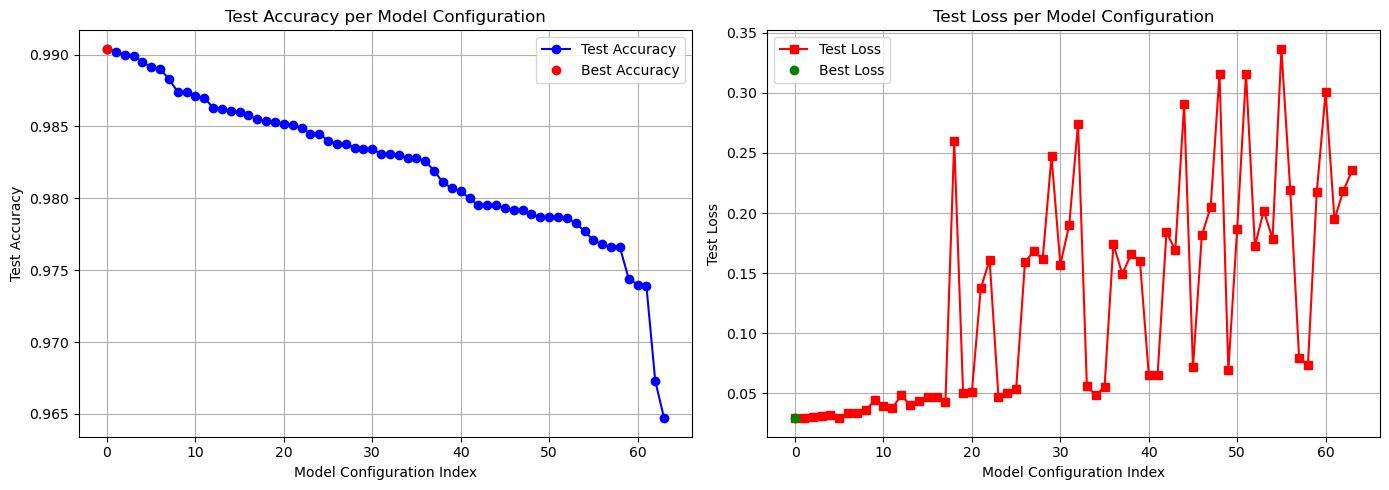

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results from the CSV file into a pd df
results_df = pd.read_csv('model_results.csv')

# Display the row with the best test accuracy
best_result = results_df.loc[results_df['test_accuracy'].idxmax()]

# Plotting accuracy and loss graphs
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Plot
ax[0].plot(results_df.index, results_df['test_accuracy'], 'bo-', label='Test Accuracy')  # Plot accuracy
ax[0].plot(best_result.name, best_result['test_accuracy'], 'ro', label='Best Accuracy')  # Highlight the best result
ax[0].set_title('Test Accuracy per Model Configuration')
ax[0].set_xlabel('Model Configuration Index')
ax[0].set_ylabel('Test Accuracy')
ax[0].legend()
ax[0].grid(True)

# Loss Plot
ax[1].plot(results_df.index, results_df['test_loss'], 'rs-', label='Test Loss')  # Plot loss
ax[1].plot(best_result.name, best_result['test_loss'], 'go', label='Best Loss')  # Highlight the best result
ax[1].set_title('Test Loss per Model Configuration')
ax[1].set_xlabel('Model Configuration Index')
ax[1].set_ylabel('Test Loss')
ax[1].legend()
ax[1].grid(True)

# Print the plots
plt.tight_layout()
plt.show()


### Kernel Size and Number of Filters
The heatmap below illustrates how varying kernel sizes and numbers of filters affect model accuracy. It seems that larger kernel sizes and more filters do not drastically change the model's performance, suggesting that the MNIST dataset can be effectively modeled with relatively simple convolutional architectures.

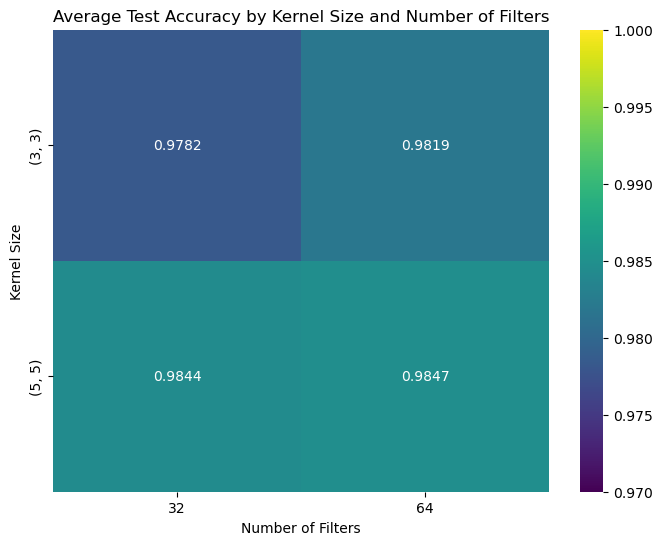

In [21]:
# Create an average accuracy for each combination of kernel_size and num_filters
heatmap_data = results_df.groupby(['kernel_size', 'num_filters'])['test_accuracy'].mean().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='viridis', vmin=0.97, vmax=1.0)
plt.title('Average Test Accuracy by Kernel Size and Number of Filters')
plt.xlabel('Number of Filters')
plt.ylabel('Kernel Size')
plt.show()


### Dropout Rate Analysis
The comparison between models with and without dropout shows that for this specific task, dropout did not significantly improve the performance. This might indicate that overfitting is not a major concern with the MNIST dataset and the current model complexity.

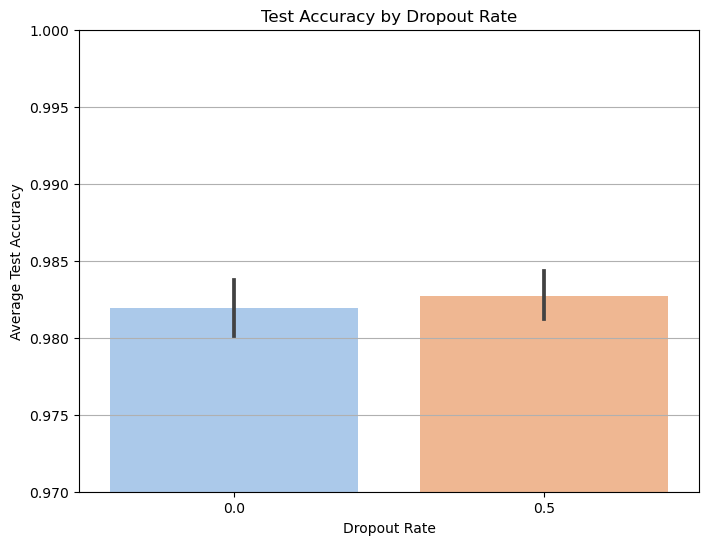

In [23]:
# Bar plot for Test Accuracy by Dropout Rate
plt.figure(figsize=(8, 6))
sns.barplot(x='dropout_rate', y='test_accuracy', data=results_df, palette='pastel')
plt.title('Test Accuracy by Dropout Rate')
plt.ylim(0.97, 1.0)  # Adjust y-axis to focus on the higher range of accuracies
plt.xlabel('Dropout Rate')
plt.ylabel('Average Test Accuracy')
plt.grid(axis='y')
plt.show()


### Dense Layer Size Effect
The distribution plots by dense layer size suggest that larger dense layers (256 neurons) don't necessarily provide a substantial accuracy advantage over smaller ones (128 neurons). This could mean that the model is capable of learning effective representations of the data without needing excessive complexity in the dense layer. However on average the model does perform slightly better with denser layers.

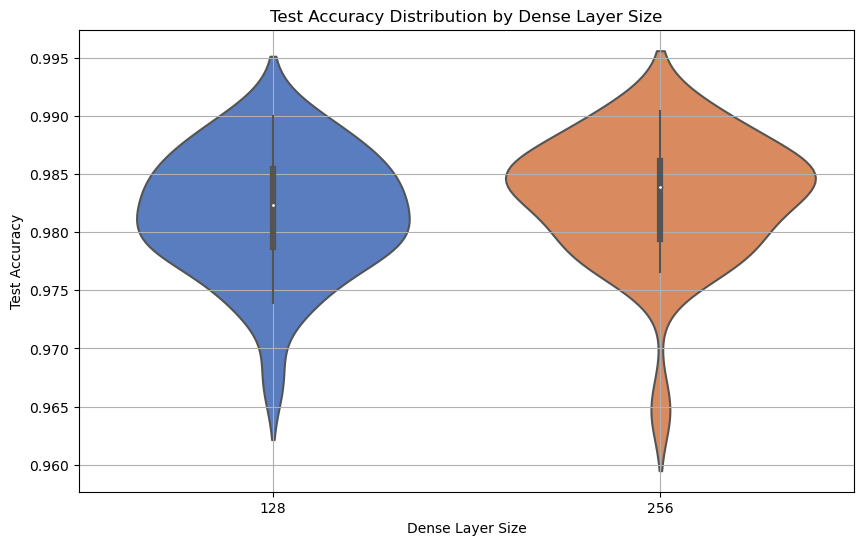

In [24]:
# Violin plot for Test Accuracy by Dense Layer Size
plt.figure(figsize=(10, 6))
sns.violinplot(x='dense_size', y='test_accuracy', data=results_df, palette='muted')
plt.title('Test Accuracy Distribution by Dense Layer Size')
plt.xlabel('Dense Layer Size')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


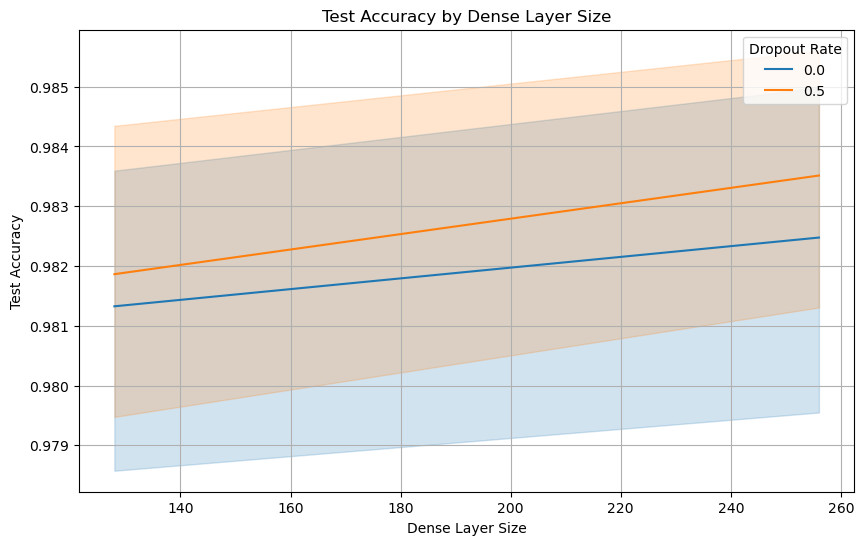

In [45]:
# Adjusting the line plot for Test Accuracy by Dense Layer Size with a more contrasting color palette
plt.figure(figsize=(10, 6))
sns.lineplot(x='dense_size', y='test_accuracy', hue='dropout_rate', data=results_df, markers=True, dashes=False, palette='tab10')
plt.title('Test Accuracy by Dense Layer Size')
plt.xlabel('Dense Layer Size')
plt.ylabel('Test Accuracy')
plt.legend(title='Dropout Rate')
plt.grid(True)
plt.show()


### Impact of L2 Regularization
The plot below for L2 regularization strength (l2_lambda) reveal that a small amount of regularization (0.001) does slightly adversely affect model accuracy and could potentially contribute to model robustness, preventing overfitting while sacrificing performance. However, wether this reduced performance is visible from the plot, doesn't mean it is significant. Further testing is needed to validate this claim.

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_3396\693277720.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='l2_lambda', y='test_accuracy', data=results_df, palette='coolwarm', ci=None)


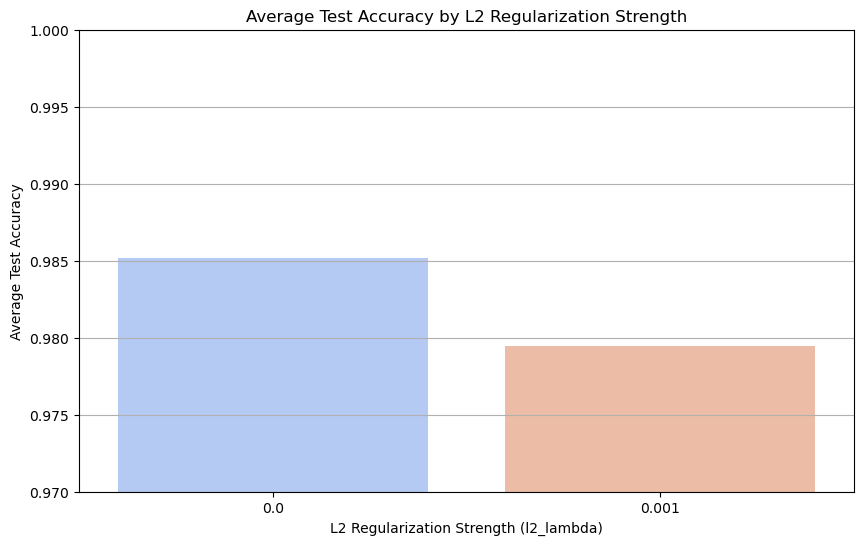

In [29]:
# Bar plot for Test Accuracy by L2 Regularization Strength (l2_lambda)
plt.figure(figsize=(10, 6))
sns.barplot(x='l2_lambda', y='test_accuracy', data=results_df, palette='coolwarm', ci=None)
plt.title('Average Test Accuracy by L2 Regularization Strength')
plt.xlabel('L2 Regularization Strength (l2_lambda)')
plt.ylim(0.97, 1.0)
plt.ylabel('Average Test Accuracy')
plt.grid(axis='y')
plt.show()


# Conclusion 
Overall, the fine-tuning process has identified that a moderately complex model with a certain level of regularization, and without dropout, can achieve high accuracy on the MNIST dataset. It's important to note that the MNIST dataset is relatively simple compared to more complex image datasets; hence, the optimal hyperparameters identified here are specific to this context and may not generalize to more complex tasks without further tuning.

In conclusion, the experiment demonstrates the nuanced effect of hyperparameters on CNN performance. It also underscores the importance of hyperparameter tuning, as even small changes can lead to noticeable differences in model outcomes. These findings could guide the development of more efficient models for similar image classification tasks.